This dataset is obtained from Kaggle. It is room occupancy data and Occupancy column is target variable (label)

Tasks to be done
 - Discover data, datatypes, check missing values (handle missing values if exists), find value counts
 - Plot distributions of individual columns, perform univariate analysis
 - Perform bi-variate analysis, plot pair-plots, make comments about what data shows



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


data = pd.read_csv('data.csv')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In this part ot the notebook, I will gather data, clean it, visualize it and identify outliers with advanced methods.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [3]:
idx = pd.date_range('2015-02-02 14:19:00', periods=2665, freq='1min')
data.index = idx
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-02-02 14:19:00,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:20:00,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
data.drop('date', axis = 1, inplace = True)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:20:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [6]:
for i in data.columns:
    print(f'Number of unique values in {i} column: {data[i].nunique()}')

Number of unique values in Temperature column: 335
Number of unique values in Humidity column: 725
Number of unique values in Light column: 428
Number of unique values in CO2 column: 1894
Number of unique values in HumidityRatio column: 1505
Number of unique values in Occupancy column: 2


In [7]:
data.Occupancy.value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

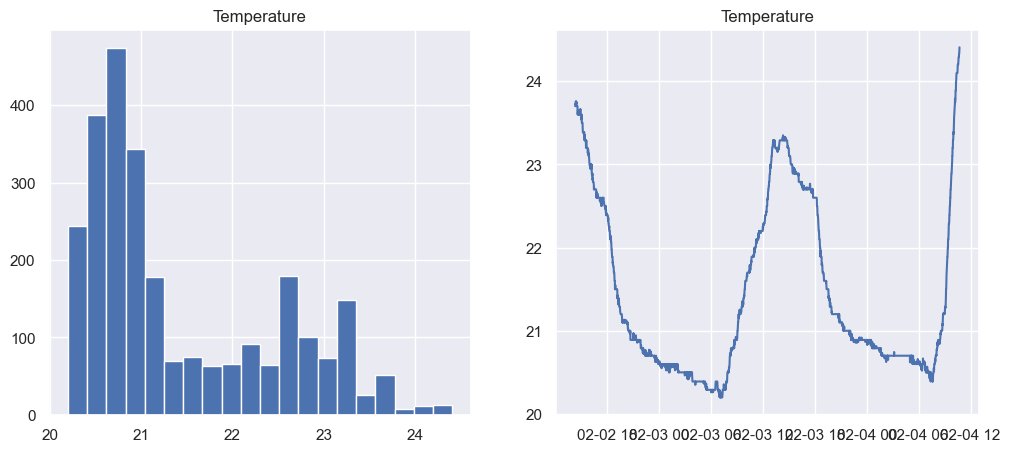

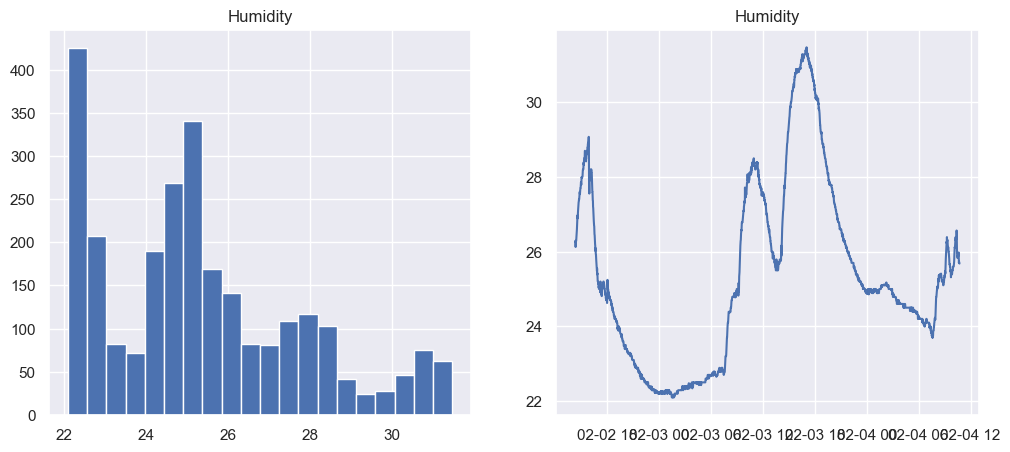

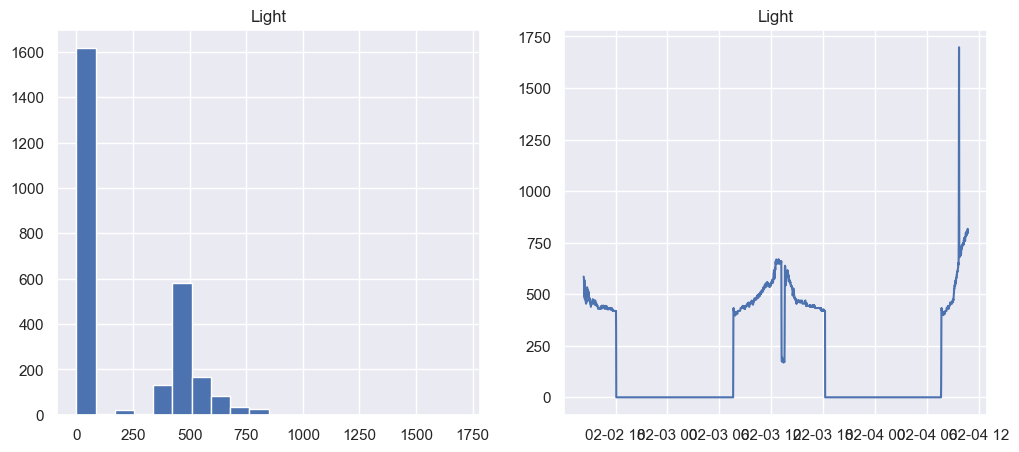

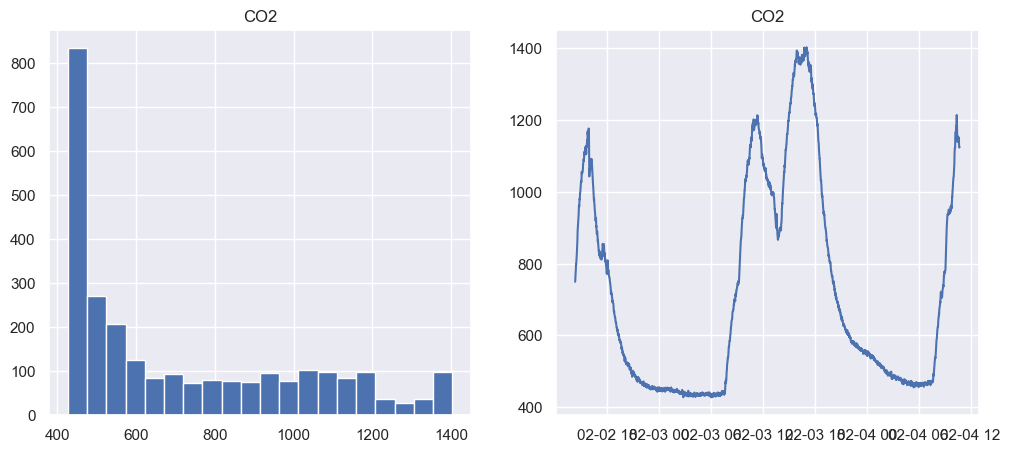

In [8]:
for i in ['Temperature', 'Humidity', 'Light', 'CO2']:
    plt.figure(figsize = (12,5))
    plt.subplot(121)
    plt.hist(data[i], bins = 20)
    plt.title(i)
    plt.subplot(122)
    plt.plot(data[i])
    plt.title(i)

- Temperature has a right skewed distribution.
- Humidity and Humidity ratio have bimodal distributions. Their histograms looks the same. From the name I understand Humidity Ratio is just the ratio of Humidity, so I will proably drop one of these columns in the following sections.
- Light and CO2 are right-skewed too. There is a spike in light data around 500. Other that that, the graphs look the same.

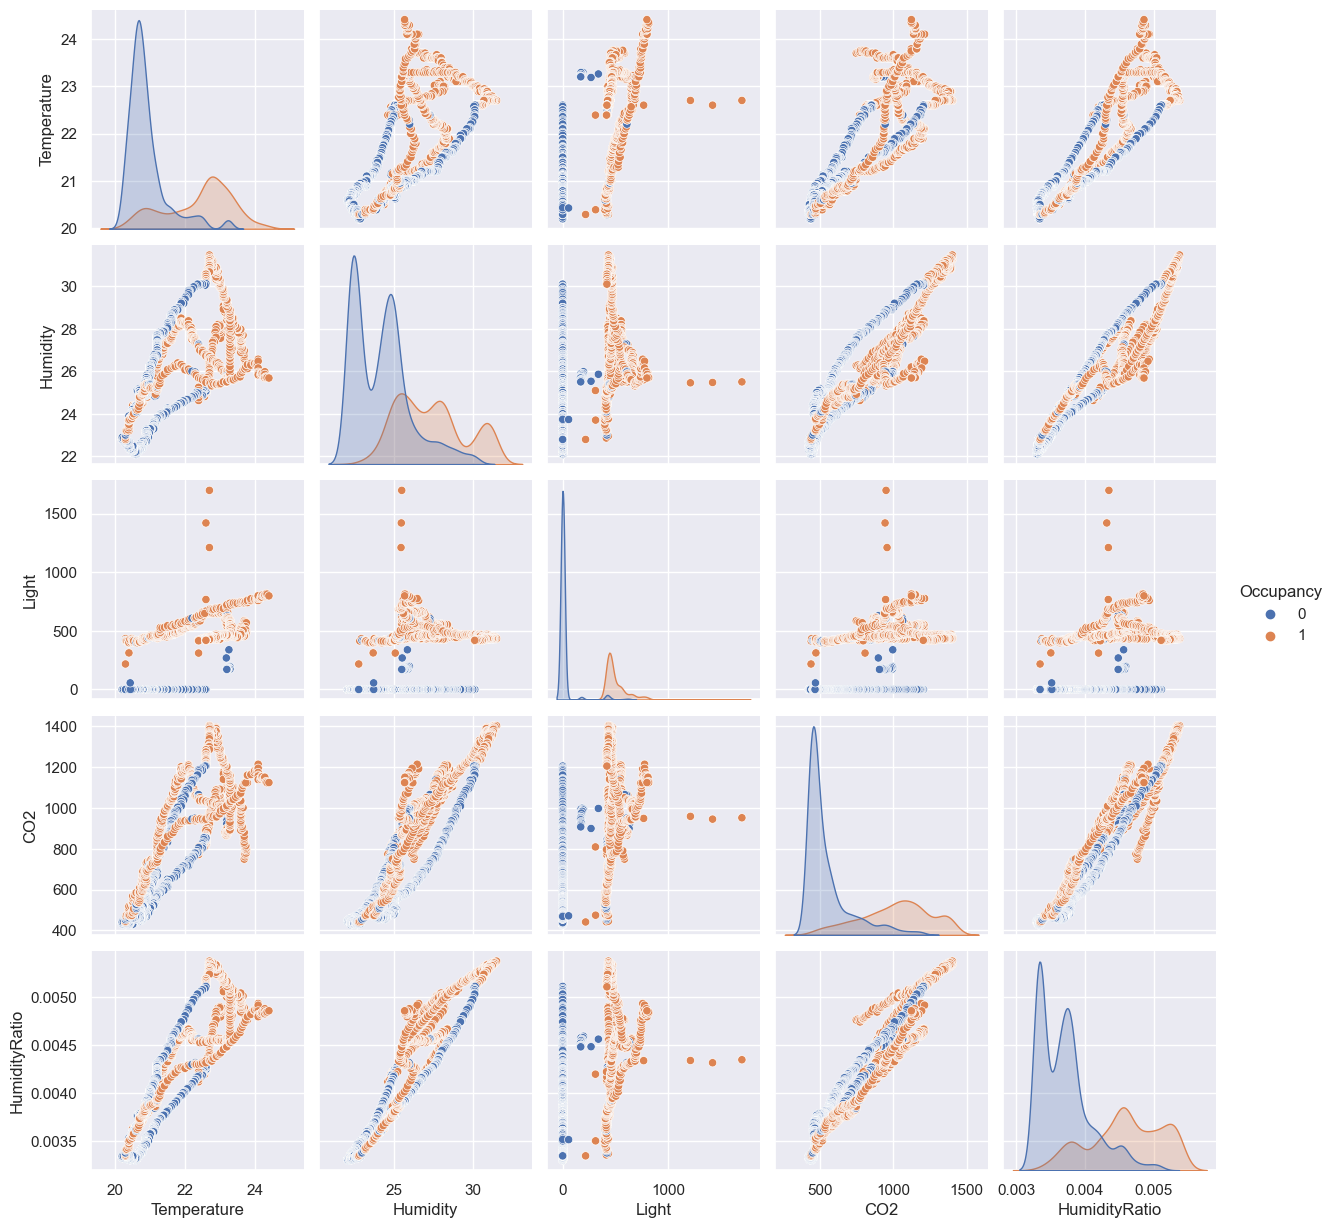

In [9]:
sns.pairplot(data, hue= 'Occupancy')

As I suspected, the correlation between humidity and humdity ratio is very high. Other than that, temperature, humidity and CO2 has a strong correlation with each other. To be sure let's check the heatmap.

<Axes: >

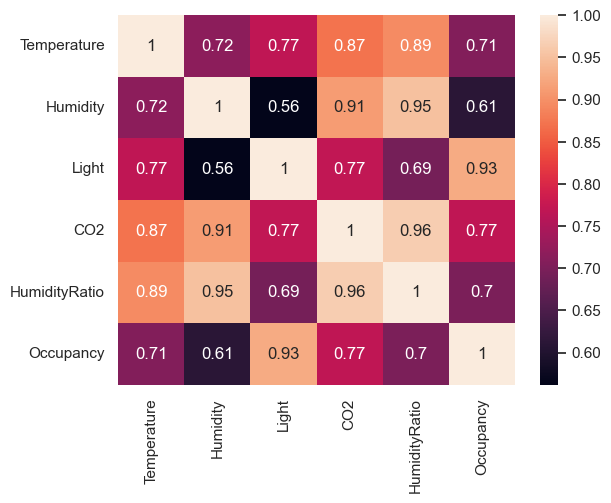

In [10]:
sns.heatmap(data.corr(), annot = True)

## Feature Analysis and Feature Extraction

 - Look at the correlation of features, remove if there are any redundant (highly correlated) features
 - Create new features using the date/time column
 


As I mentioned in the previous section, I will remove Humidity Ratio. I will keep the rest for now.

In [11]:
data.drop('HumidityRatio', axis=1, inplace=True)

In [12]:
# I have added a 'mins' column
day1 = np.arange(0, 24*60, 1)
day2 = np.arange(0, 1225, 1)
mins = np.concatenate([day1, day2])
data['mins'] = mins
data.head()

,Temperature,Humidity,Light,CO2,Occupancy,mins
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,1,0
2015-02-02 14:20:00,23.7180,26.290,578.400000,760.400000,1,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1,2
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1,3
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,1,4


In [13]:
def cycle_encode(data, cols):
    for col in cols:
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/data[col].max())
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/data[col].max())
    return data

In [14]:
cols  = ['mins']
data = cycle_encode(data,cols)
data.drop('mins', axis=1, inplace=True)
data.head()

,Temperature,Humidity,Light,CO2,Occupancy,mins_sin,mins_cos
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,1,0.000000,1.000000
2015-02-02 14:20:00,23.7180,26.290,578.400000,760.400000,1,0.004366,0.999990
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1,0.008733,0.999962
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1,0.013099,0.999914
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,1,0.017465,0.999847


<Axes: >

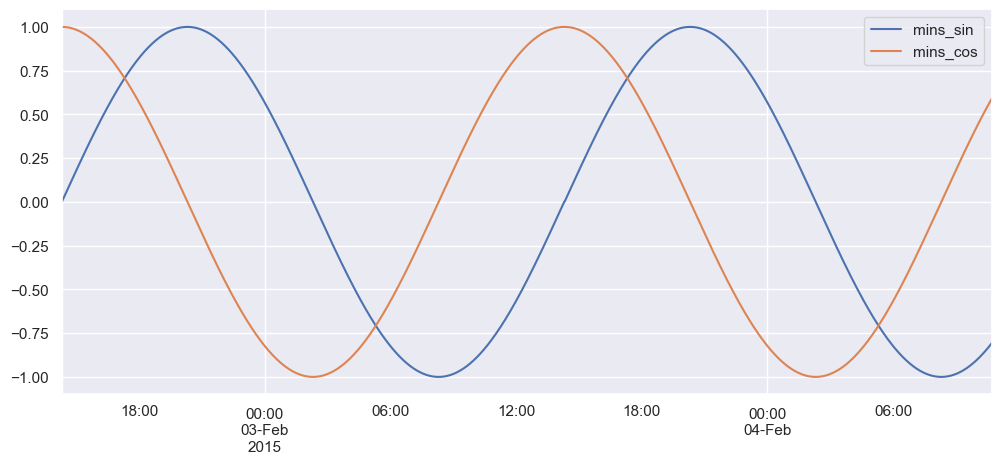

In [15]:
# I have turned the mins into sin and cosine values to capture the dailiy cycles.
data[['mins_sin','mins_cos']].plot(figsize = (12,5))

## Find outliers with PCA algorithm
Use PCA algorithm to first analyze your data and using PCA detect outliers in the data.
Check the results with the target label (Occupancy) 

In [16]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, make_scorer, accuracy_score, average_precision_score
from sklearn.metrics import roc_curve, auc

In [18]:
def print_results(headline, true_value, pred):
    scores=[]
    CM = confusion_matrix(true_value, pred)
    scores.append(headline)
    scores.append(accuracy_score(true_value, pred))      #accuracy
    scores.append(int(CM[1,1]))                          #TP
    scores.append(int(CM[0,1]))                          #FP
    scores.append(int(CM[0][0]))                         #TN
    scores.append(int(CM[1][0]))                         #FN
    scores.append(precision_score(true_value, pred))     #precision
    scores.append(recall_score(true_value, pred))        #recall
    scores.append(roc_auc_score(true_value, pred))      #roc_auc
    p, r, _ = precision_recall_curve(true_value, pred) 
    scores.append(auc(r,p))                              #pr_auc
    scores.append(f1_score(true_value, pred))            #f1-score
    scores.append(fbeta_score(true_value, pred, beta=2)) #f2-score
    return scores

score_names = ['method','accuracy','TP','FP','TN','FN','precision','recall','roc_auc','pr_auc','f1', 'f2']
dfAcc = pd.DataFrame(data=np.zeros(shape=(0,12)), columns = score_names)

In [19]:
X = data[['Temperature', 'Humidity', 'Light', 'CO2', 'mins_sin','mins_cos']]

X_std = (X - X.mean()) / X.std()

pca = PCA(n_components=2)

pca.fit(X_std)

X_pca = pca.transform(X_std)

X_reconstructed = pca.inverse_transform(X_pca)

mse = np.mean(np.power(X_std - X_reconstructed, 2), axis=1)

threshold = np.percentile(mse, 95)

df_pca = pd.DataFrame({'Temperature': X['Temperature'], 
                       'Humidity': X['Humidity'], 
                       'Light': X['Light'], 
                       'CO2': X['CO2'], 
                       'Reconstruction Error': mse})

anomalies = (df_pca['Reconstruction Error'] > threshold).astype('int')

data['Predicted_Anomalies'] = anomalies.values

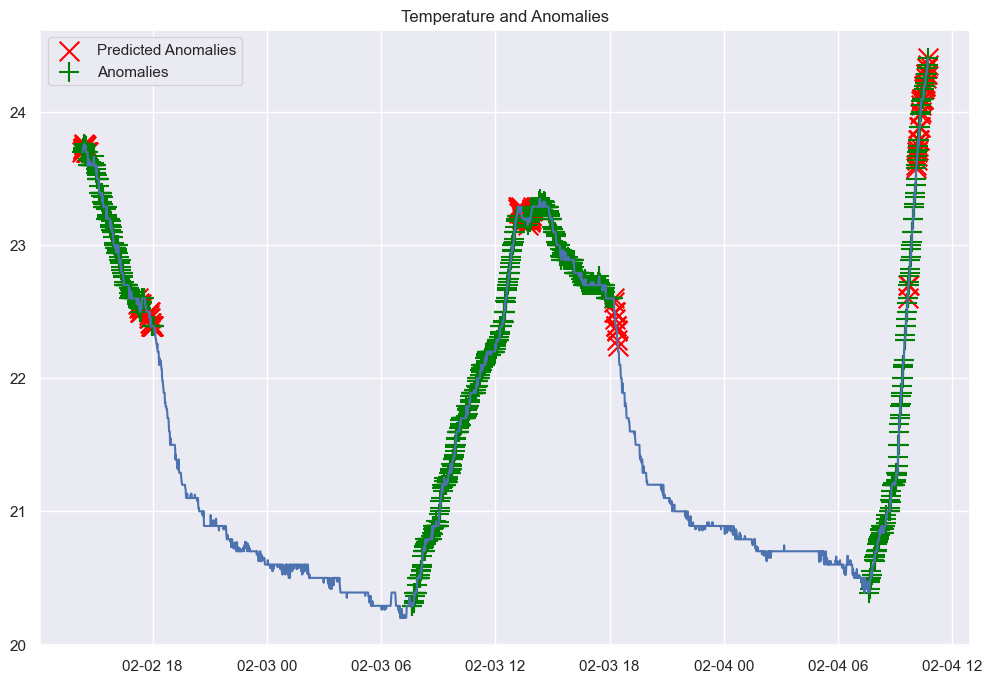

In [20]:
plt.figure(figsize = (12,8))
plt.plot(df_pca['Temperature'])
plt.title('Temperature and Anomalies')
plt.scatter(df_pca[df_pca['Reconstruction Error'] > threshold]['Temperature'].index,    #X eksenindeki yeri
            df_pca[df_pca['Reconstruction Error'] > threshold]['Temperature'].values,   #Y eksenindeki yeri
            c='red', label = 'Predicted Anomalies', marker='x', s = 200)

plt.scatter(data[data['Occupancy'] == 1]['Temperature'].index,    #X eksenindeki yeri
            data[data['Occupancy'] == 1]['Temperature'].values,   #Y eksenindeki yeri
            c='green', label = 'Anomalies', marker='+', s = 200)
plt.legend()
plt.show()

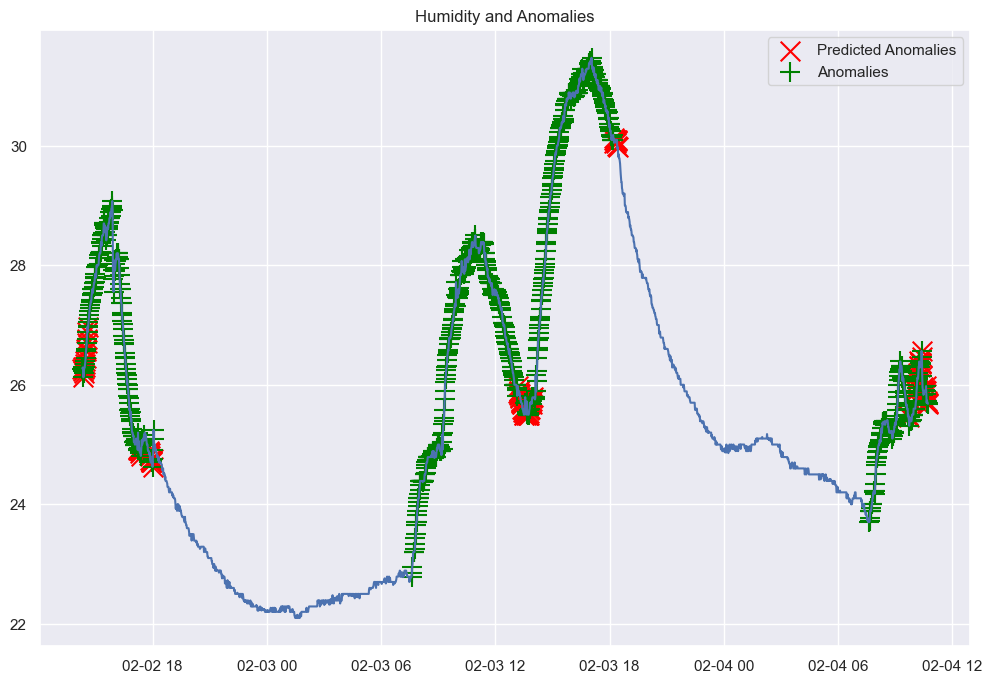

In [21]:
plt.figure(figsize = (12,8))
plt.plot(df_pca['Humidity'])
plt.title('Humidity and Anomalies')
plt.scatter(df_pca[df_pca['Reconstruction Error'] > threshold]['Humidity'].index,    #X eksenindeki yeri
            df_pca[df_pca['Reconstruction Error'] > threshold]['Humidity'].values,   #Y eksenindeki yeri
            c='red', label = 'Predicted Anomalies', marker='x', s = 200)

plt.scatter(data[data['Occupancy'] == 1]['Humidity'].index,    #X eksenindeki yeri
            data[data['Occupancy'] == 1]['Humidity'].values,   #Y eksenindeki yeri
            c='green', label = 'Anomalies', marker='+', s = 200)
plt.legend()
plt.show()

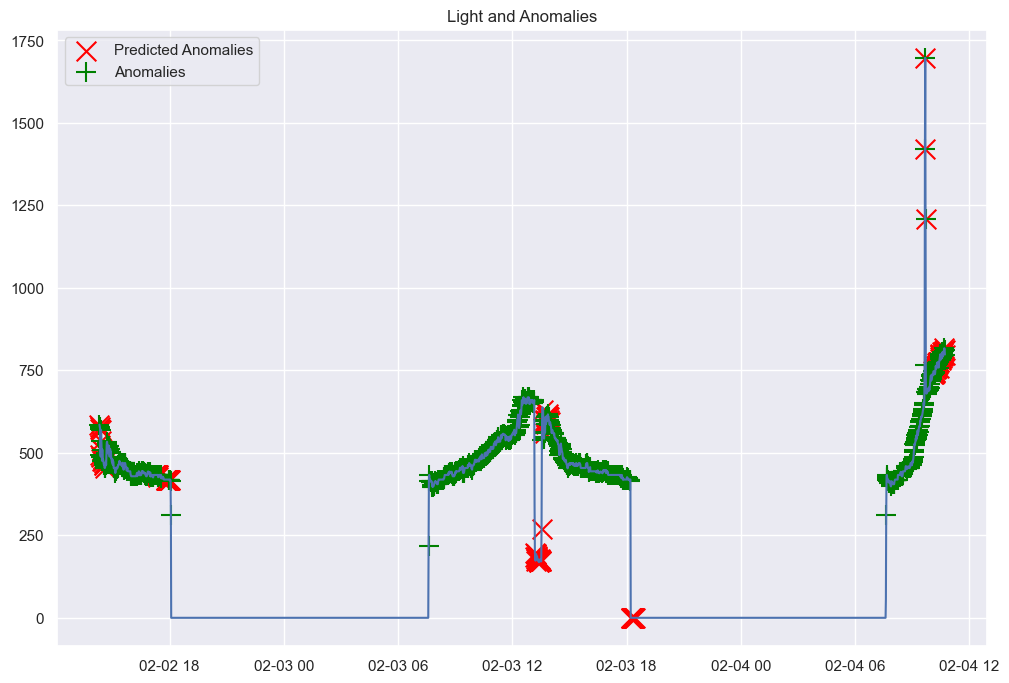

In [22]:
plt.figure(figsize = (12,8))
plt.plot(df_pca['Light'])
plt.title('Light and Anomalies')
plt.scatter(df_pca[df_pca['Reconstruction Error'] > threshold]['Light'].index,    #X eksenindeki yeri
            df_pca[df_pca['Reconstruction Error'] > threshold]['Light'].values,   #Y eksenindeki yeri
            c='red', label = 'Predicted Anomalies', marker='x', s = 200)

plt.scatter(data[data['Occupancy'] == 1]['Light'].index,    #X eksenindeki yeri
            data[data['Occupancy'] == 1]['Light'].values,   #Y eksenindeki yeri
            c='green', label = 'Anomalies', marker='+', s = 200)
plt.legend()
plt.show()

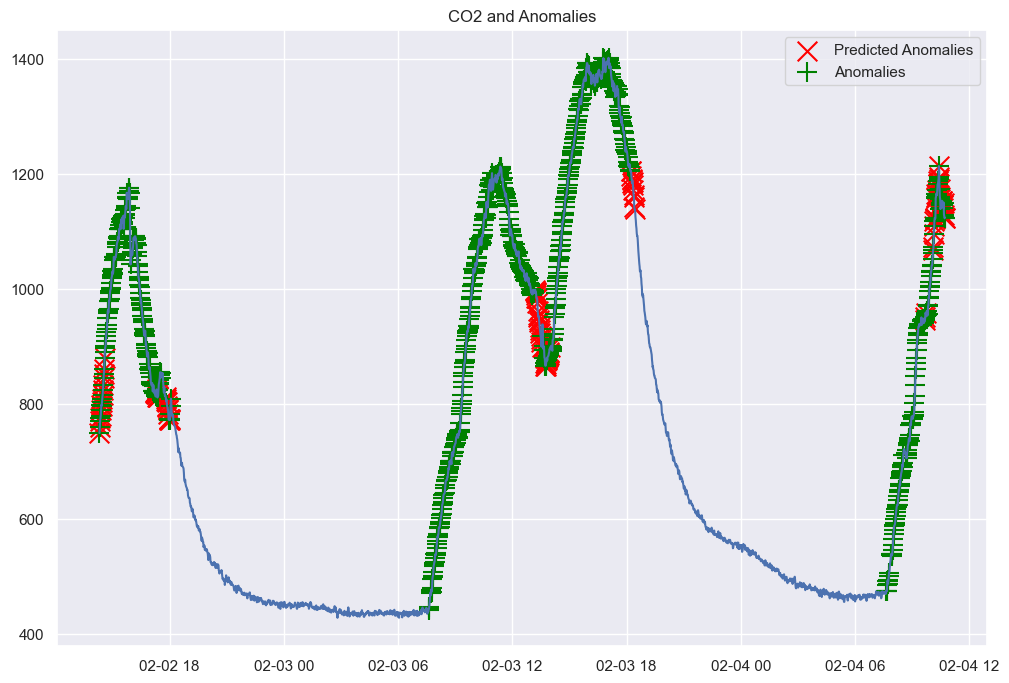

In [23]:
plt.figure(figsize = (12,8))
plt.plot(df_pca['CO2'])
plt.title('CO2 and Anomalies')
plt.scatter(df_pca[df_pca['Reconstruction Error'] > threshold]['CO2'].index,    #X eksenindeki yeri
            df_pca[df_pca['Reconstruction Error'] > threshold]['CO2'].values,   #Y eksenindeki yeri
            c='red', label = 'Predicted Anomalies', marker='x', s = 200)

plt.scatter(data[data['Occupancy'] == 1]['CO2'].index,    #X eksenindeki yeri
            data[data['Occupancy'] == 1]['CO2'].values,   #Y eksenindeki yeri
            c='green', label = 'Anomalies', marker='+', s = 200)
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

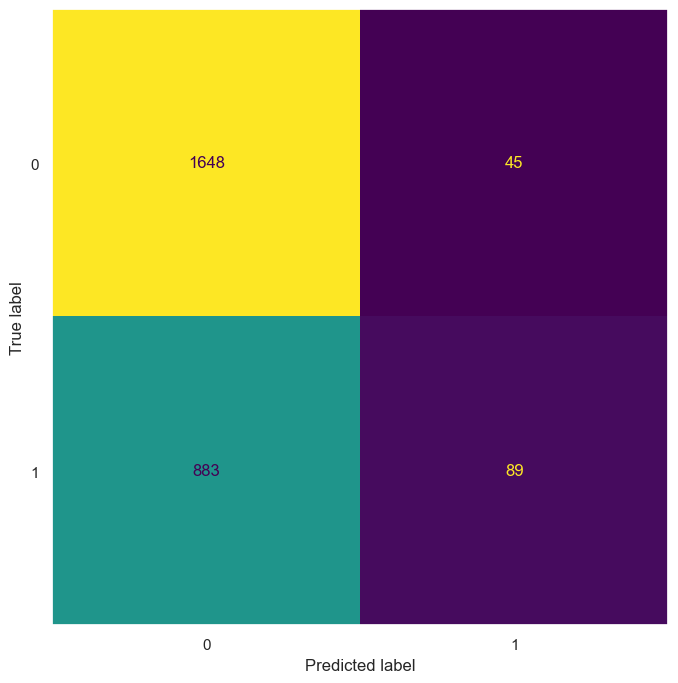

In [25]:
plt.rcParams['figure.figsize'] = 12, 8
ConfusionMatrixDisplay.from_predictions(data.Occupancy,data.Predicted_Anomalies, colorbar=False)
plt.grid(False)

In [26]:
scores = print_results('PCA Performance', data.Occupancy, data.Predicted_Anomalies)
dftmp = pd.DataFrame([scores], columns=score_names)
dfAcc = pd.concat([dfAcc, dftmp], ignore_index=True)
dfAcc[['TP','FP', 'TN', 'FN']] = dfAcc[['TP','FP', 'TN', 'FN']].astype(int)
dfAcc.style.hide(axis='index')

method,accuracy,TP,FP,TN,FN,precision,recall,roc_auc,pr_auc,f1,f2
PCA Performance,0.651782,89,45,1648,883,0.664179,0.091564,0.532492,0.543537,0.160940,0.110641


## Time-series analysis of temperature data
- Use only the date/time related featuers and temperature and perform time-series analysis on data
- How temperature changes on different time periods? Is there a seasonality and trend in data?
- Perform frequency domain analysis (Fourier analysis) on data and show the dominant frequencies.
- Plot the temperature data as a combination of these frequencies

I have turned the data into hourly form. To be able to seasonal decompose the data, I am going to add some synthetic data points.

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
hourlyData = pd.DataFrame(data.drop(['Occupancy','mins_sin','mins_cos','Predicted_Anomalies'], axis = 1).resample(rule = 'h').mean())
hourlyData.reset_index(inplace=True)
temp = pd.DataFrame([hourlyData.iloc[-1].values], columns=hourlyData.columns)
hourlyData = pd.concat([hourlyData, temp])
hourlyData = pd.concat([hourlyData, temp])
hourlyData = pd.concat([hourlyData, temp])
hourlyData.iloc[45,0] = '2015-02-04 11:00:00'
hourlyData.iloc[46,0] = '2015-02-04 12:00:00'
hourlyData.iloc[47,0] = '2015-02-04 13:00:00'
hourlyData.index =pd.to_datetime(hourlyData['index'])

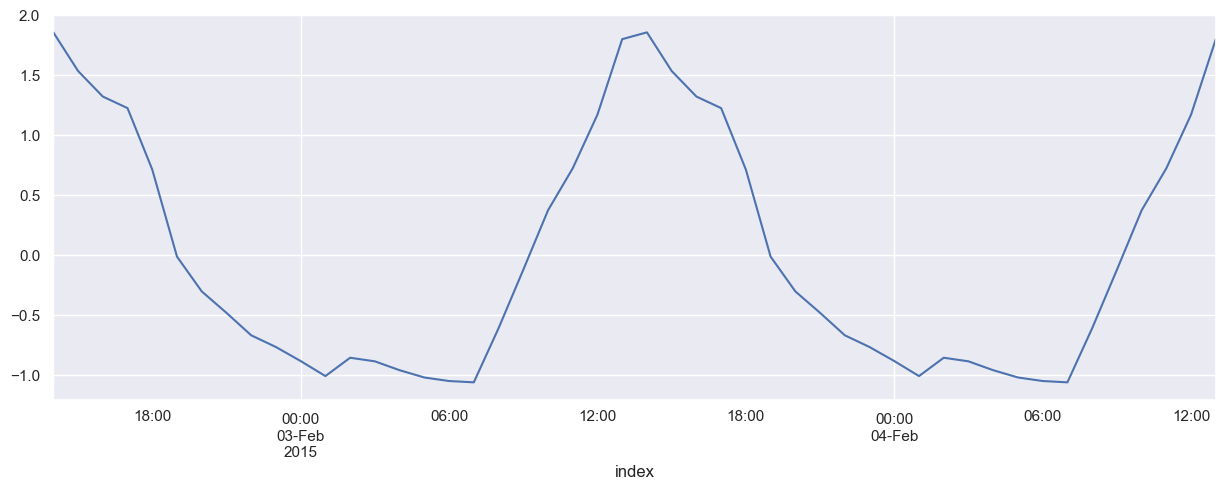

In [29]:
plt.rcParams['figure.figsize'] = 15, 5
seasonal = seasonal_decompose(hourlyData.Temperature, model = 'additive')
seasonal.seasonal.plot(); 
plt.show()

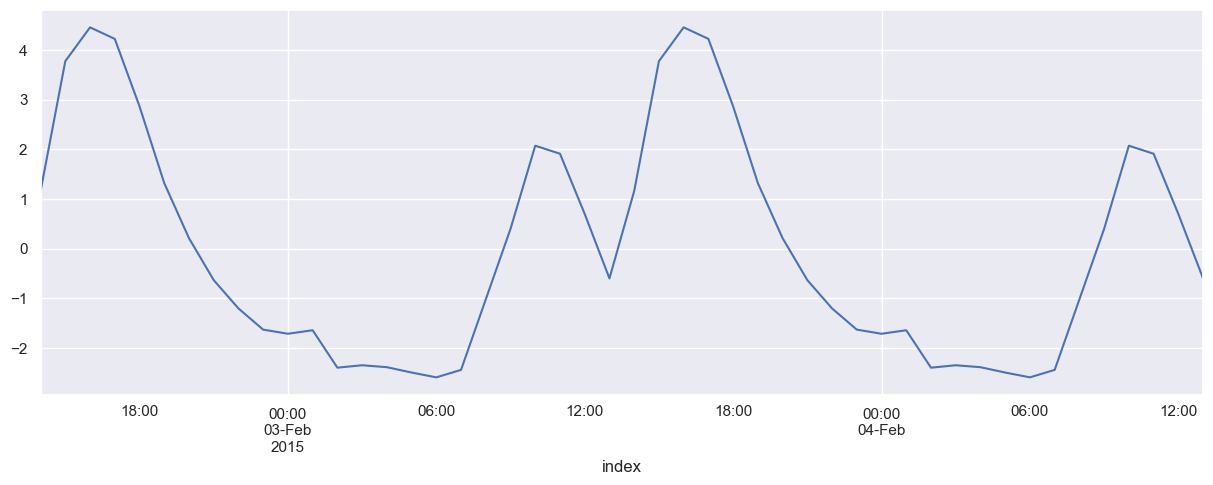

In [30]:
seasonal = seasonal_decompose(hourlyData.Humidity, model = 'additive')
seasonal.seasonal.plot(); 
plt.show()

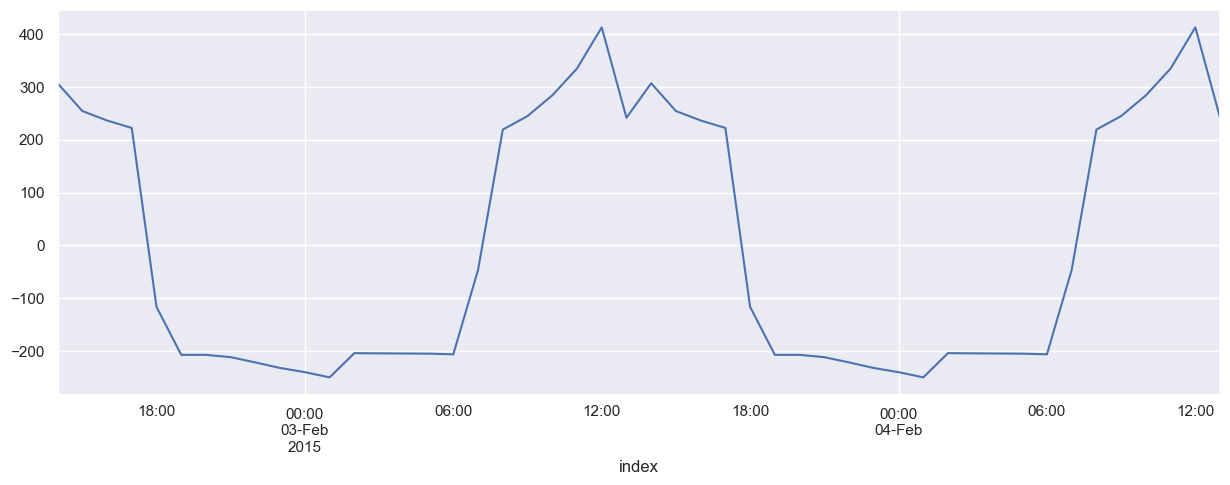

In [31]:
seasonal = seasonal_decompose(hourlyData.Light, model = 'additive')
seasonal.seasonal.plot(); 
plt.show()

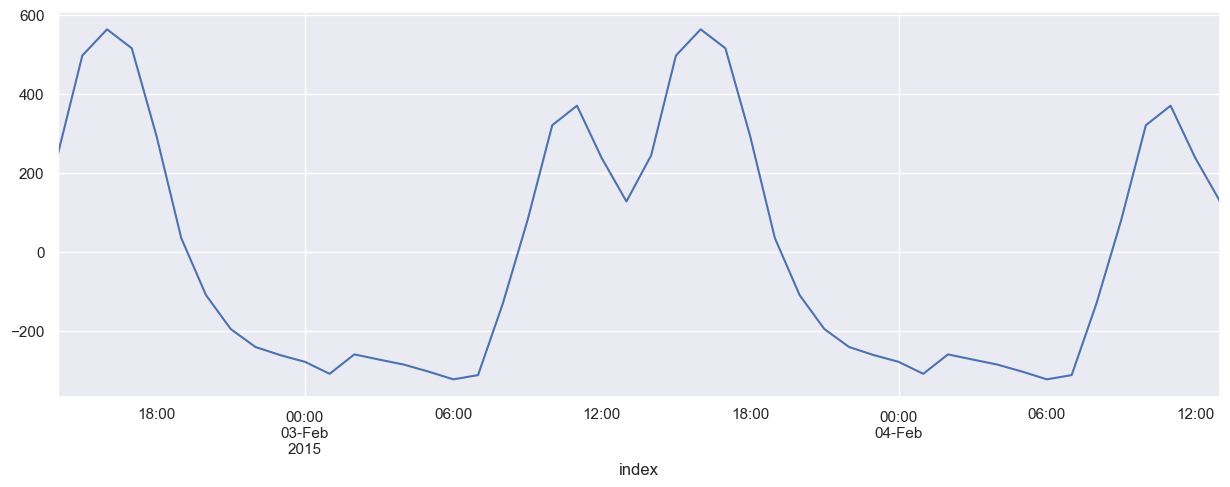

In [32]:
seasonal = seasonal_decompose(hourlyData.CO2, model = 'additive')
seasonal.seasonal.plot(); 
plt.show()

The dominant frequency for Temperature is 0.00 Hz
The dominant frequency for Humidity is 0.00 Hz
The dominant frequency for Light is -0.00 Hz
The dominant frequency for CO2 is 0.00 Hz
The dominant frequency for Occupancy is 0.00 Hz
The dominant frequency for mins_sin is 0.00 Hz
The dominant frequency for mins_cos is 0.00 Hz
The dominant frequency for Predicted_Anomalies is 0.00 Hz


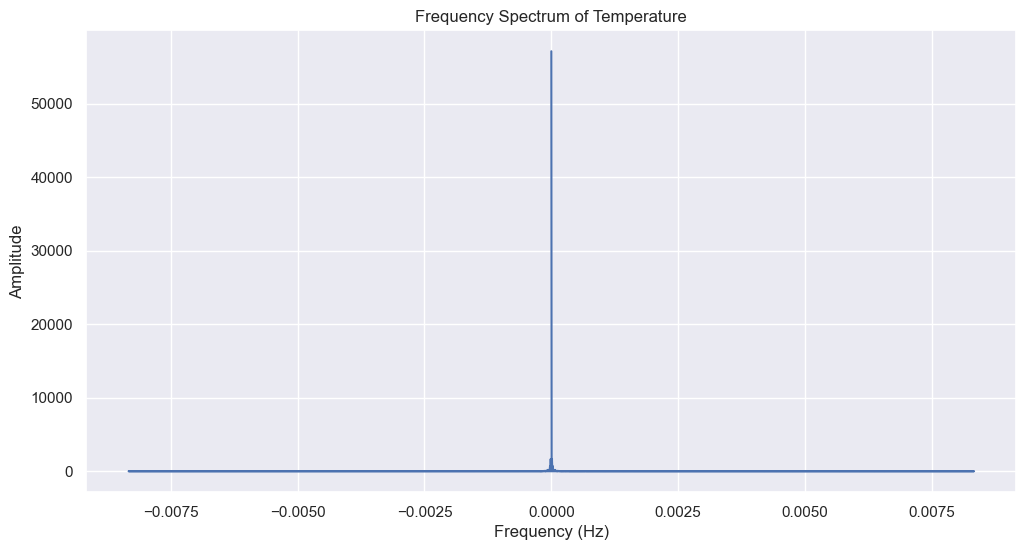

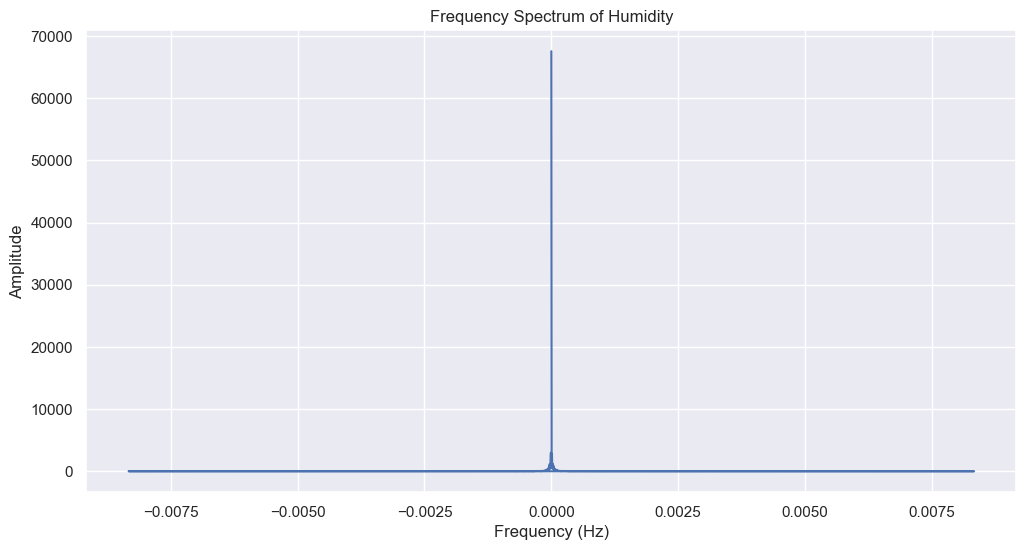

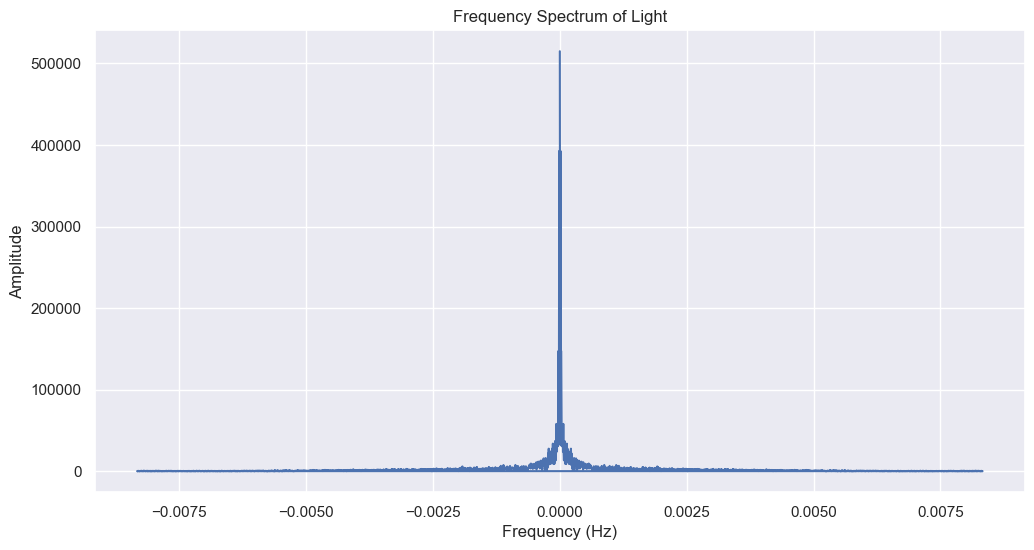

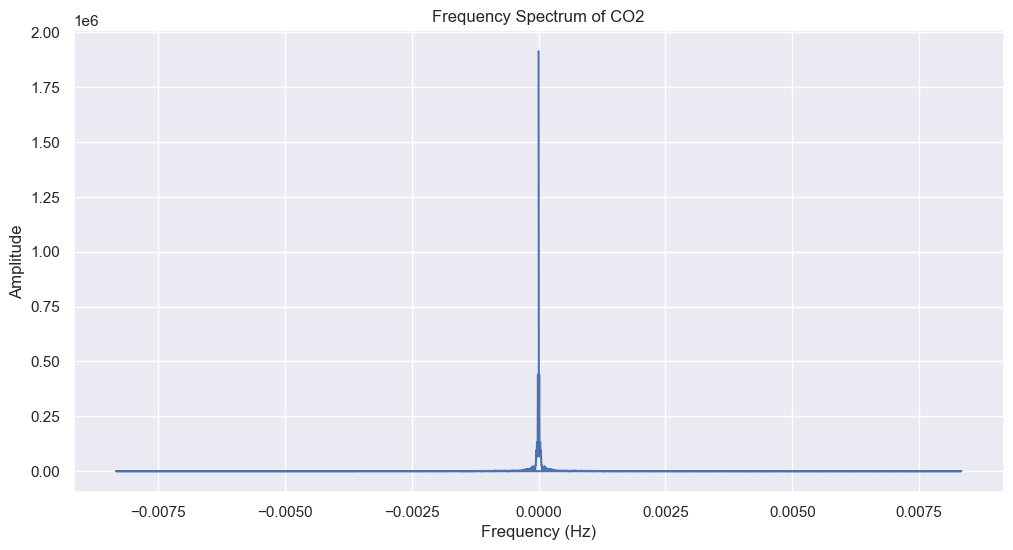

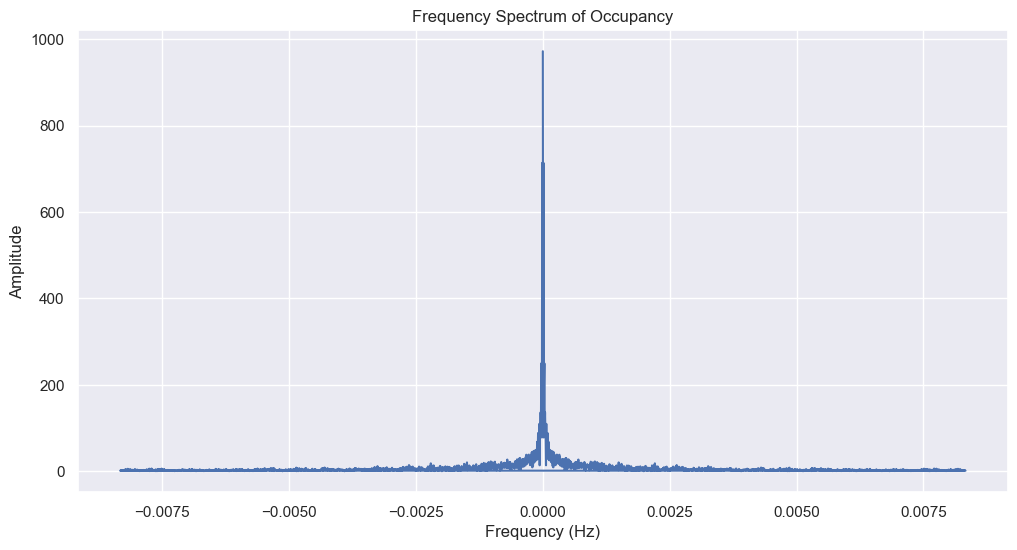

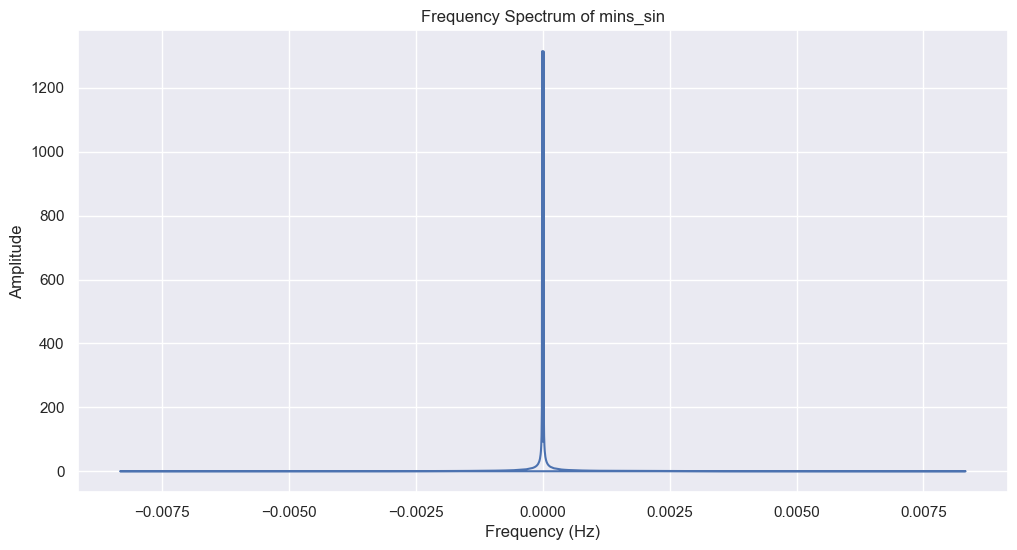

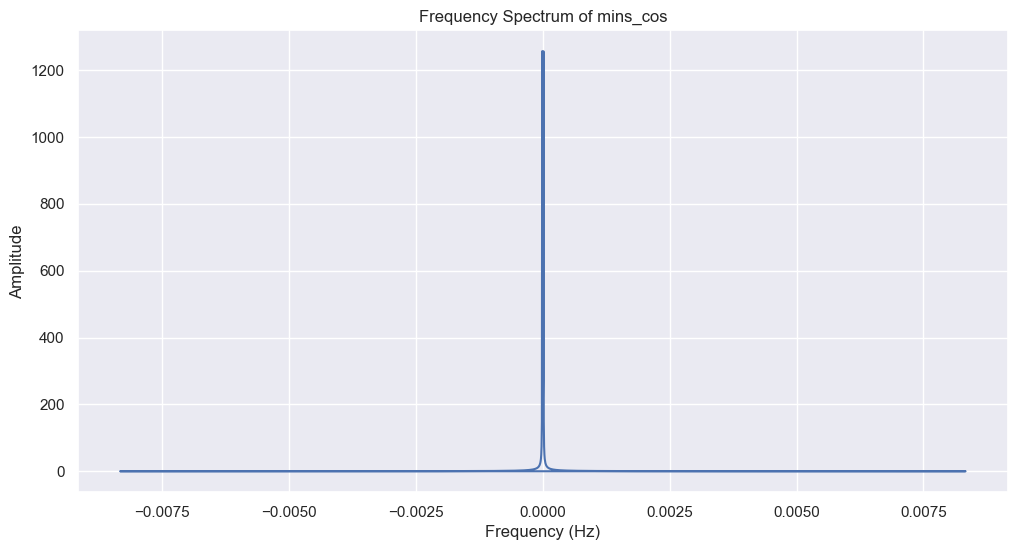

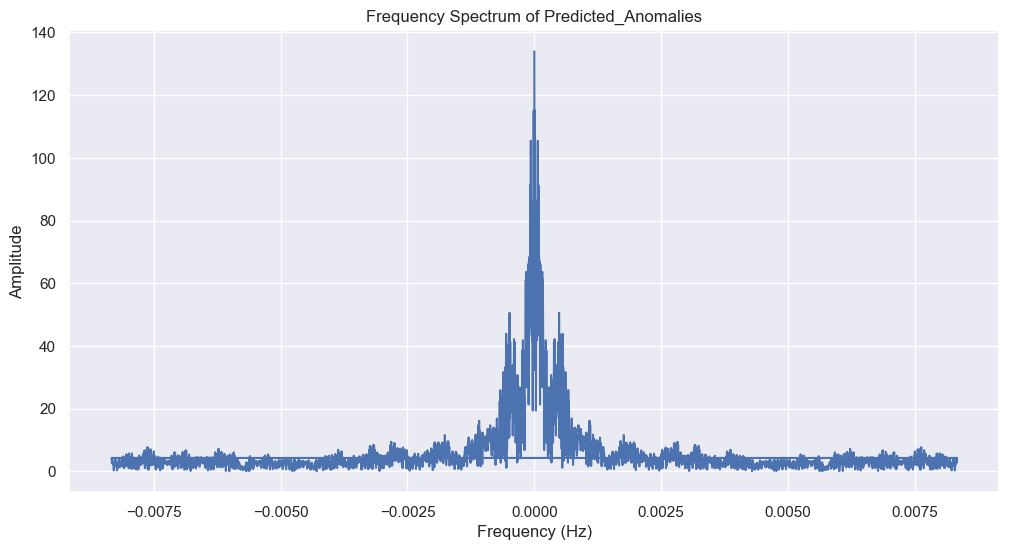

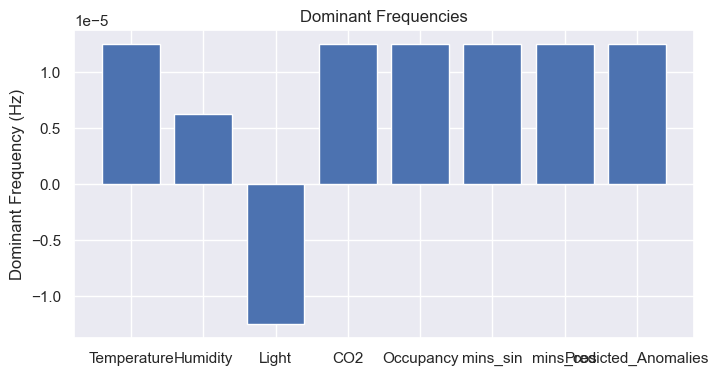

In [33]:
# Define the sampling frequency and sampling interval
fs = 1/60 # Sampling frequency (Hz)
T = 1/fs # Sampling interval (s)

# Get the number of samples in the data
N = len(data)

# Generate the time vector
t = np.arange(N) * T

# Perform Fourier transform on each column of data
freqs = []
for col in data.columns:
    signal = data[col].values
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(N, T)
    freqs.append(freq)
    
    # Plot the frequency spectrum for the current signal
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(freq, np.abs(signal_fft))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Frequency Spectrum of {col}')

# Find the dominant frequency for each signal
dominant_freqs = []
for i, freq in enumerate(freqs):
    signal_fft = np.fft.fft(data.iloc[:, i])
    signal_fft_abs = np.abs(signal_fft)
    max_freq_idx = np.argmax(signal_fft_abs[1:]) + 1
    dominant_freq = freq[max_freq_idx]
    dominant_freqs.append(dominant_freq)
    print(f"The dominant frequency for {data.columns[i]} is {dominant_freq:.2f} Hz")

# Plot the dominant frequencies
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(data.columns, dominant_freqs)
ax.set_ylabel('Dominant Frequency (Hz)')
ax.set_title('Dominant Frequencies')
plt.show()
